# **🚗 Auto Insurance Churn Prediction — Texas**


**Dataset:** Auto Insurance churn analysis dataset [Kaggle](https://www.kaggle.com/datasets/merishnasuwal/auto-insurance-churn-analysis-dataset/data)

**Data Overview:** 
- **2,280,321** unique customers
- **2,112,579** customers with demographic data
- **269,259** customers **churned** (cancelled their policy in the last year)

## **Data Dictionary**

This dataset contains customer and address details for an insurance company.

---

### **1. Address Information**
| Column Name     | Description  |
|----------------|-------------|
| **ADDRESS_ID** | Unique ID for a specific address |
| **LATITUDE** | Latitude of the address |
| **LONGITUDE** | Longitude of the address |
| **CITY** | City |
| **STATE** | State |
| **COUNTY** | County |

---

### **2. Customer Information**
| Column Name     | Description  |
|----------------|-------------|
| **INDIVIDUAL_ID** | Unique ID for a specific insurance customer |
| **ADDRESS_ID** | Unique ID for the primary address associated with a customer |
| **CURR_ANN_AMT** | The annual dollar value paid by the customer in the previous year (not the policy amount) |
| **DAYS_TENURE** | The number of days the individual has been a customer with the insurance agency |
| **CUST_ORIG_DATE** | The date the individual became a customer |
| **AGE_IN_YEARS** | Age of the individual |
| **DATE_OF_BIRTH** | Individual's date of birth |
| **INCOME** | Estimated income for the household associated with the individual |

---

### **3. Household & Lifestyle Information**
| Column Name     | Description  |
|----------------|-------------|
| **HAS_CHILDREN** | Flag (`1` = Individual has children in the home, `0` = Otherwise) |
| **LENGTH_OF_RESIDENCE** | Estimated number of years the individual has lived in their current home |
| **MARITAL_STATUS** | Estimated marital status (`Married` or `Single`) |
| **HOME_MARKET_VALUE** | Estimated value of the home |
| **HOME_OWNER** | Flag (`1` = Individual owns their primary home, `0` = Otherwise) |
| **COLLEGE_DEGREE** | Flag (`1` = Individual has a college degree or more, `0` = Otherwise) |
| **GOOD_CREDIT** | Flag (`1` = Individual has a FICO score greater than 630, `0` = Otherwise) |

---

### **4. Account Status**
| Column Name     | Description  |
|----------------|-------------|
| **ACCT_SUSPD_DATE** | Date of account suspension or cancellation |

---

## 🔍 **Data Loading & Exploration**

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
import statsmodels.discrete.discrete_model as sml

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv(r"Dataset\Auto_churn\autoinsurance_churn.csv")
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0


In [3]:
# View summary statistics
df.describe()

,individual_id,address_id,curr_ann_amt,days_tenure,age_in_years,latitude,longitude,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
count,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.427190e+06,1.427190e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06
mean,2.213018e+11,5.213007e+11,9.403140e+02,3.602007e+03,5.581648e+01,3.285130e+01,-9.694764e+01,8.149773e+04,5.221336e-01,7.501612e+00,8.201003e-01,3.515033e-01,8.411937e-01,1.150901e-01
std,9.926327e+05,4.174711e+05,2.465392e+02,2.341005e+03,1.455192e+01,1.944458e-01,2.963725e-01,5.438100e+04,4.995100e-01,5.135309e+00,3.841040e-01,4.774399e-01,3.654955e-01,3.191308e-01
min,2.213000e+11,5.213000e+11,-1.943131e+02,2.000000e+01,2.300000e+01,3.199061e+01,-9.802223e+01,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,7.721025e+02,1.398000e+03,4.500000e+01,3.271247e+01,-9.716765e+01,4.750000e+04,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.213018e+11,5.213007e+11,9.350098e+02,3.651000e+03,5.500000e+01,3.284678e+01,-9.690326e+01,7.000000e+04,1.000000e+00,6.801000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.213027e+11,5.213010e+11,1.102992e+03,6.291000e+03,6.400000e+01,3.298491e+01,-9.672065e+01,8.750000e+04,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,2.213033e+11,5.213015e+11,2.269374e+03,6.291000e+03,1.140000e+02,3.354658e+01,-9.607035e+01,2.500000e+05,1.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

In [5]:
# View null values
df.isnull().sum()

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                     12067
state                        0
county                   12067
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value        92286
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1487453
Churn                        0
dtype: int64

In [6]:
# Shape of the dataset
df.shape

(1680909, 22)

In [7]:
# Features present in dataset
columns = df.columns
columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

In [8]:
# Unique values in feature 'state'
states = df['state'].unique()
states

array(['TX'], dtype=object)

## 🧼 **Data Cleaning**

In [9]:
# define columns and drop
drop_columns = [ 'latitude','longitude','acct_suspd_date','state','individual_id','address_id']
df.drop(columns=drop_columns,inplace=True)

- "*latitude, longitude*" -  The physical addresses provided are unrelated to the corresponding lat/long (Provided in data description).
- "*acct_suspd_date*" - may leak future info as which was used to derive a binary churn/did not churn variable.
- "*state*" - is constant (Texas).
- "*individual_id, address_id*" - are unique identifiers.

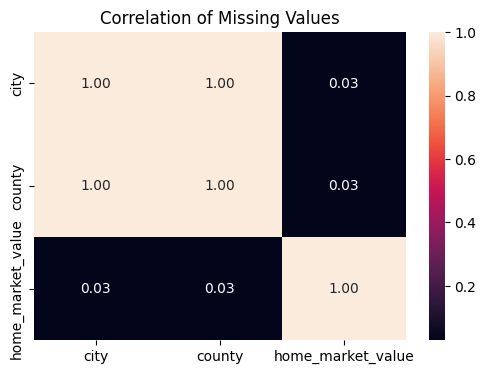

In [10]:
# Create a missing values indicator DataFrame
missing_df = df[['city','county','home_market_value']].isnull().astype(int)

# Compute the correlation matrix
corr_matrix = missing_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation of Missing Values')
plt.show()


Before imputing or dropping missing values, we explore whether missingness in different columns is related. This helps determine if the missing data is random or systematically tied to certain fields.

We have three features with missing values (`city`, `county`, `home_market_value`). So, We create a binary indicator for missingness in `city`, `county`, and `home_market_value`, then compute and visualize their correlation.

There is a perfect correlation between `city` and `county` missing values whenever `city` is missing, `county` is also missing. Since their missingness overlaps completely, one of them (e.g., `city`) can be safely **dropped**.

The feature `home_market_value` shows a very low correlation (~0.03) with the other two. This indicates that its missingness is independent, and it should be treated separately, as we should consider **imputing** the missing values rather than dropping the column.


In [11]:
# drop missing values
df.dropna(subset = ['city','county'],inplace=True)
df.isnull().sum()

curr_ann_amt               0
days_tenure                0
cust_orig_date             0
age_in_years               0
date_of_birth              0
city                       0
county                     0
income                     0
has_children               0
length_of_residence        0
marital_status             0
home_market_value      90691
home_owner                 0
college_degree             0
good_credit                0
Churn                      0
dtype: int64

In [12]:
# Clean and transform home_market_value from a string range to a single numeric average value

df[['min_home_mrkt_value', 'max_home_mrkt_value']] = df['home_market_value'].str.split(' - ', expand=True)
df['min_home_mrkt_value'] = pd.to_numeric(df['min_home_mrkt_value'], errors='coerce')
df['max_home_mrkt_value'] = pd.to_numeric(df['max_home_mrkt_value'], errors='coerce')
df['home_market_value'] = df[['min_home_mrkt_value', 'max_home_mrkt_value']].mean(axis=1)

df.drop(columns=['min_home_mrkt_value', 'max_home_mrkt_value'], inplace=True)
df.head()

,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,818.877997,1454.0,2018-12-09,44,1978-06-23,Kaufman,Kaufman,22500.0,1.0,15.0,Married,62499.5,1.0,1.0,1.0,0
1,974.199182,1795.0,2018-01-02,72,1950-05-30,Grand Prairie,Dallas,27500.0,0.0,2.0,Single,62499.5,1.0,0.0,0.0,0
2,967.375112,4818.0,2009-09-23,55,1967-07-07,Dallas,Dallas,42500.0,0.0,10.0,Married,87499.5,1.0,0.0,0.0,0
3,992.409561,130.0,2022-07-25,53,1969-05-25,Arlington,Tarrant,125000.0,1.0,6.0,Married,187499.5,1.0,0.0,1.0,1
4,784.633494,5896.0,2006-10-11,50,1972-09-25,Fort Worth,Tarrant,87500.0,1.0,4.0,Married,237499.5,1.0,1.0,1.0,0


In [13]:
print("Minimum home market value:", df['home_market_value'].min())
print("Maximum home market value:", df['home_market_value'].max())
print("Mean home market value:", df['home_market_value'].mean())
print("Median home market value:", df['home_market_value'].median())
print(df['home_market_value'].mean() -  df['home_market_value'].median())

Minimum home market value: 12999.5
Maximum home market value: 874999.5
Mean home market value: 130918.91997377531
Median home market value: 112499.5
18419.419973775308


The `home_market_value` feature, after converting from a string range to a numeric average, we can observe that the mean is noticeably higher than the median, this indicates that the distribution is **right-skewed**, likely due to a small number of high-value properties.

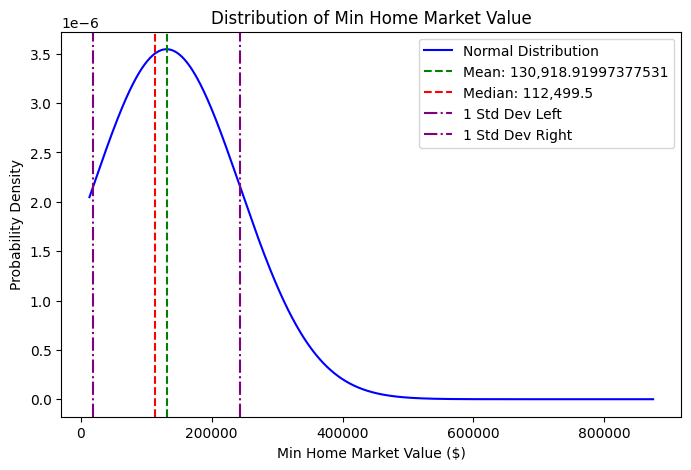

In [14]:
min_value = df['home_market_value'].min()
max_value = df['home_market_value'].max()
mean_value = df['home_market_value'].mean()
median_value = df['home_market_value'].median()
std_dev = df['home_market_value'].median()
count =len(df['home_market_value'])

# Generate x values from min to max for min_home_mrkt_value
x_values = np.linspace(min_value, max_value, count)
# Generate normal distribution using mean and standard deviation
y_values = norm.pdf(x_values, mean_value, std_dev)

# Plot the normal distribution for min_home_mrkt_value
plt.figure(figsize=(8, 5))

plt.plot(x_values, y_values, color='blue', label="Normal Distribution")
plt.axvline(x=mean_value, color='green', linestyle='--', label=f"Mean: {mean_value:,}")
plt.axvline(x=median_value, color='red', linestyle='--', label=f"Median: {median_value:,}")
plt.axvline(x=mean_value - std_dev, color='purple', linestyle='-.', label="1 Std Dev Left")
plt.axvline(x=mean_value + std_dev, color='purple', linestyle='-.', label="1 Std Dev Right")
plt.title("Distribution of Min Home Market Value")
plt.xlabel("Min Home Market Value ($)")
plt.ylabel("Probability Density")
plt.legend()

Since the `home_market_value` feature is right-skewed with a mean significantly higher than the median imputing missing values using the **median** is a better choice. The median is less affected by extreme outliers and better represents the central tendency of skewed distributions.

In [15]:
# Impute missing values with median
df['home_market_value'] = df['home_market_value'].fillna(df['home_market_value'].median())
df.isnull().sum()

curr_ann_amt           0
days_tenure            0
cust_orig_date         0
age_in_years           0
date_of_birth          0
city                   0
county                 0
income                 0
has_children           0
length_of_residence    0
marital_status         0
home_market_value      0
home_owner             0
college_degree         0
good_credit            0
Churn                  0
dtype: int64

## 🛠 Feature Engineering

Features with DType Object: `cust_orig_date`, `date_of_birth`, `city`, `county`, `marital_status`

In [16]:
# Understand values in Object feature
counties = df['county'].unique()
cities = df['city'].unique()
status = df['marital_status'].unique()

print(f"Counties: {counties}\n")
print(f"Cities: {cities}\n")
print(f"Martial Status: {status}\n")

Counties: ['Kaufman' 'Dallas' 'Tarrant' 'Denton' 'Collin' 'Parker' 'Ellis' 'Navarro'
 'Hunt' 'Johnson' 'Rockwall' 'Cooke' 'Grayson' 'Hill']

Cities: ['Kaufman' 'Grand Prairie' 'Dallas' 'Arlington' 'Fort Worth' 'Carrollton'
 'Allen' 'Bedford' 'The Colony' 'Mckinney' 'Irving' 'Mesquite' 'Hurst'
 'Garland' 'Sachse' 'Euless' 'Plano' 'Frisco' 'Grapevine' 'Cedar Hill'
 'Keller' 'Justin' 'Wylie' 'Aledo' 'Waxahachie' 'Seagoville'
 'North Richland Hills' 'Desoto' 'Roanoke' 'Southlake' 'Lancaster' 'Kemp'
 'Mansfield' 'Richardson' 'Rice' 'Caddo Mills' 'Red Oak' 'Weatherford'
 'Flower Mound' 'Denton' 'Ennis' 'Midlothian' 'Coppell' 'Sanger' 'Aubrey'
 'Burleson' 'Duncanville' 'Crowley' 'Rockwall' 'Rowlett' 'Colleyville'
 'Lewisville' 'Balch Springs' 'Argyle' 'Lake Dallas' 'Haslet' 'Terrell'
 'Forney' 'Haltom City' 'Azle' 'Addison' 'Italy' 'Springtown' 'Joshua'
 'Princeton' 'Anna' 'Little Elm' 'Crandall' 'Ponder' 'Royse City'
 'Valley View' 'Ferris' 'Scurry' 'Farmersville' 'Prosper' 'Kennedale'
 'Lav

In [17]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

# Encode 'county' and 'city' using their frequency
df['county'] = df['county'].map(df['county'].value_counts(normalize=True))
df['city'] = df['city'].map(df['city'].value_counts(normalize=True))

# Convert customer origin date to datetime to calculate customer age in years
df['cust_orig_date'] = pd.to_datetime(df['cust_orig_date'])
df['cust_org_age'] = (pd.Timestamp.today() - df['cust_orig_date']).dt.days // 365

# Convert date of birth to datetime to calculate current age in years
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['age_in_years'] = (pd.Timestamp.today() - df['date_of_birth']).dt.days // 365

# Encode marital status using ordinal encoding
df['marital_status'] = encoder.fit_transform(df[['marital_status']])


# Drop original datetime columns after transformation.
drop_columns = ['cust_orig_date','date_of_birth']
df.drop(columns=drop_columns,inplace=True)

In [18]:
df.head()

,curr_ann_amt,days_tenure,age_in_years,city,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn,cust_org_age
0,818.877997,1454.0,46,0.003336,0.018956,22500.0,1.0,15.0,0.0,62499.5,1.0,1.0,1.0,0,6
1,974.199182,1795.0,74,0.025644,0.373900,27500.0,0.0,2.0,1.0,62499.5,1.0,0.0,0.0,0,7
2,967.375112,4818.0,57,0.183324,0.373900,42500.0,0.0,10.0,0.0,87499.5,1.0,0.0,0.0,0,15
3,992.409561,130.0,55,0.059195,0.291680,125000.0,1.0,6.0,0.0,187499.5,1.0,0.0,1.0,1,2
4,784.633494,5896.0,52,0.131500,0.291680,87500.0,1.0,4.0,0.0,237499.5,1.0,1.0,1.0,0,18


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668842 entries, 0 to 1680908
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   curr_ann_amt         1668842 non-null  float64
 1   days_tenure          1668842 non-null  float64
 2   age_in_years         1668842 non-null  int64  
 3   city                 1668842 non-null  float64
 4   county               1668842 non-null  float64
 5   income               1668842 non-null  float64
 6   has_children         1668842 non-null  float64
 7   length_of_residence  1668842 non-null  float64
 8   marital_status       1668842 non-null  float64
 9   home_market_value    1668842 non-null  float64
 10  home_owner           1668842 non-null  float64
 11  college_degree       1668842 non-null  float64
 12  good_credit          1668842 non-null  float64
 13  Churn                1668842 non-null  int64  
 14  cust_org_age         1668842 non-null  int64  
dtypes: 

In [20]:
# Has Dependents 
df["has_dependents"] = ((df["has_children"] == 1) & (df["marital_status"] == 1)).astype(int)

# Property - income ratio
df["home_value_to_income"] = df["home_market_value"] / (df["income"])

We introduce these features to enhance the model's ability to capture household stability and financial characteristics:

- `has_dependents`: Flags customers likely to have dependents based on being married and has children.
- `home_value_to_income`: Measures property value relative to income, which may indicate financial pressure or wealth.

These features are intended to capture behavioral patterns that could be relevant to churn prediction. We will check the significance of these features in the next section.

## 📊 Stastical Analysis & Visualization

In [21]:
from scipy.stats import ttest_ind


T-statistic for 'curr_ann_amt': 23.655, P-value: 0.00000
Churned mean: 953.1330250494367
Not churned mean: 938.9840711235363


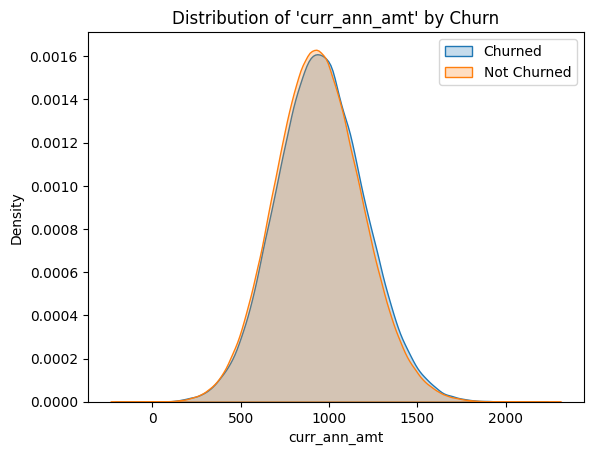


T-statistic for 'days_tenure': -275.765, P-value: 0.00000
Churned mean: 2245.7294990182445
Not churned mean: 3777.2971969185537


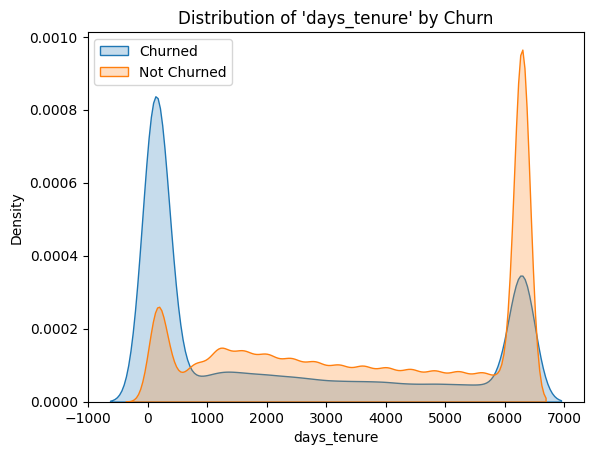


T-statistic for 'age_in_years': -71.247, P-value: 0.00000
Churned mean: 55.516028395389654
Not churned mean: 58.031648676666855


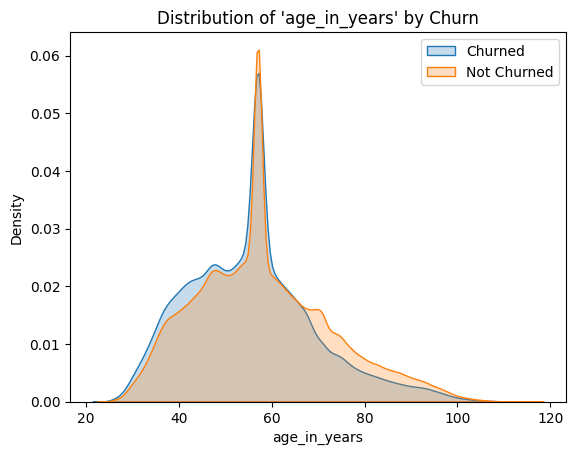


T-statistic for 'income': -7.666, P-value: 0.00000
Churned mean: 80916.96523300155
Not churned mean: 81927.73472353855


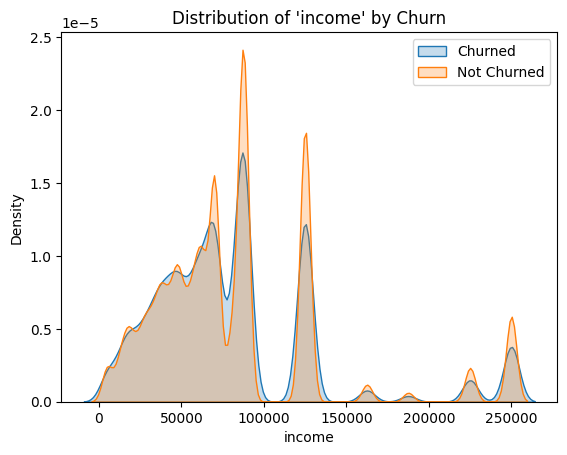


T-statistic for 'has_children': 27.452, P-value: 0.00000
Churned mean: 0.5523872022832976
Not churned mean: 0.519131063033953


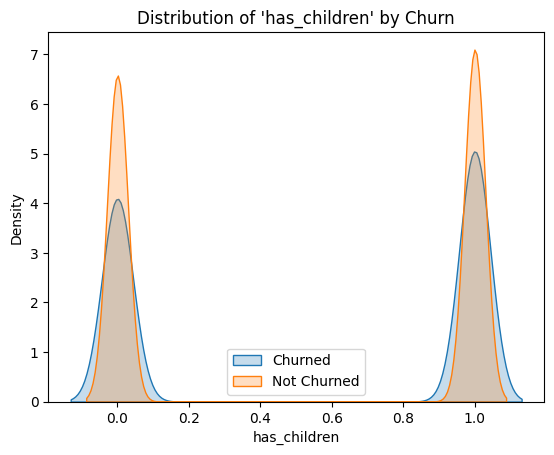


T-statistic for 'length_of_residence': -45.897, P-value: 0.00000
Churned mean: 7.004482742457148
Not churned mean: 7.5756697771388755


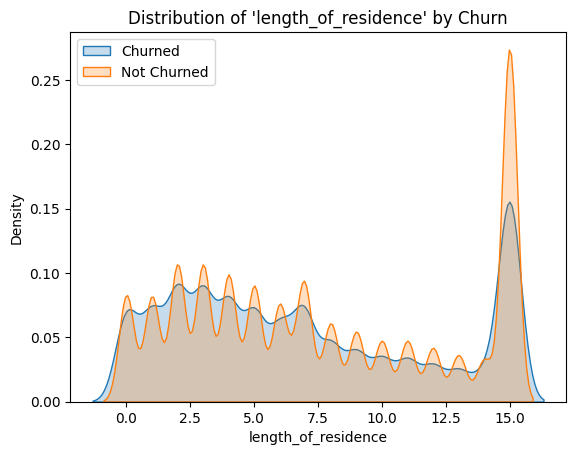


T-statistic for 'marital_status': 5.834, P-value: 0.00000
Churned mean: 0.3815982041947261
Not churned mean: 0.3747443018501001


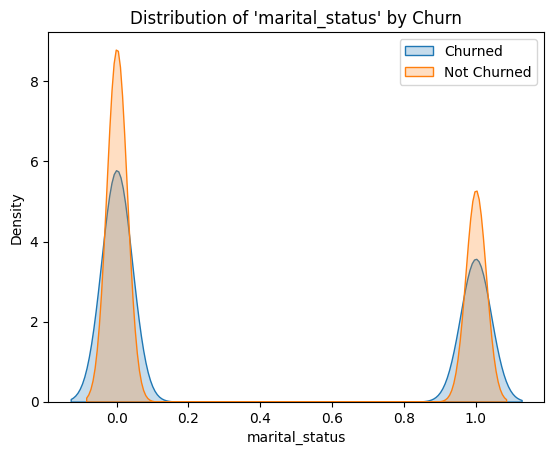


T-statistic for 'home_market_value': -0.303, P-value: 0.76164
Churned mean: 129844.59096212039
Not churned mean: 129905.35161957396


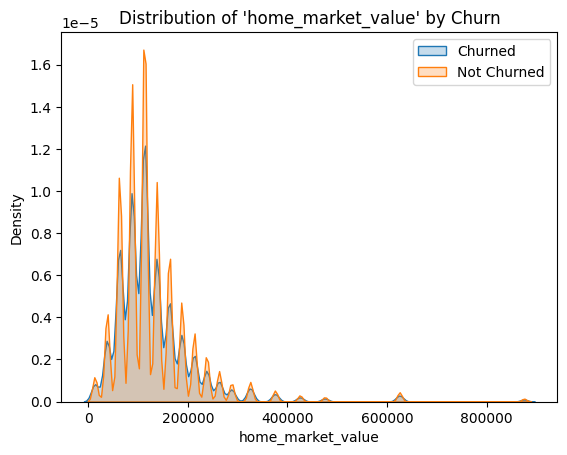


T-statistic for 'home_owner': -17.828, P-value: 0.00000
Churned mean: 0.8071175971208783
Not churned mean: 0.8236679827658939


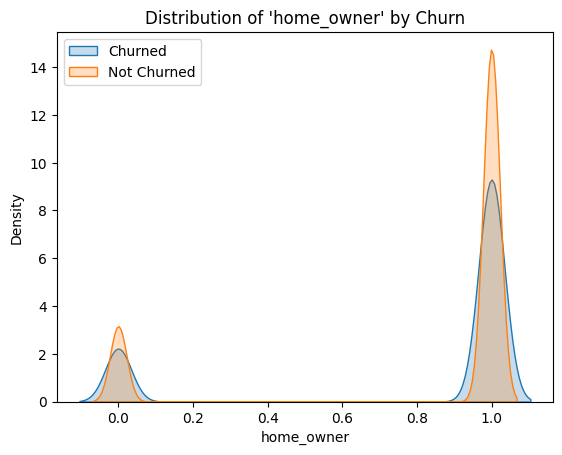


T-statistic for 'college_degree': -22.417, P-value: 0.00000
Churned mean: 0.32894798518773144
Not churned mean: 0.354915464718903


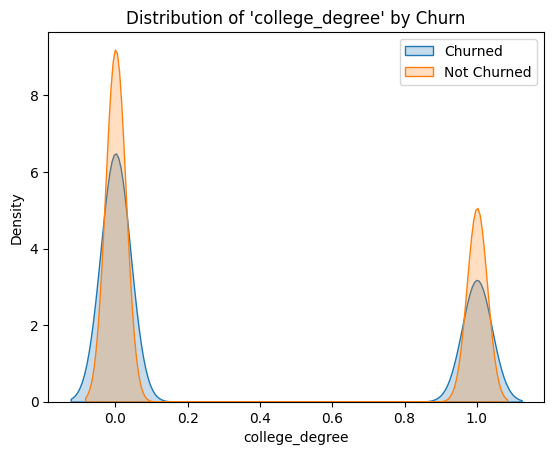


T-statistic for 'good_credit': -9.305, P-value: 0.00000
Churned mean: 0.8378879496674531
Not churned mean: 0.8460549863593797


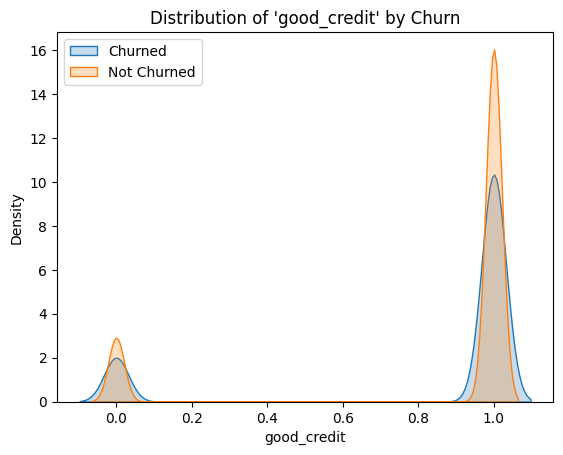


T-statistic for 'cust_org_age': -278.752, P-value: 0.00000
Churned mean: 7.916511721171023
Not churned mean: 12.158185827974478


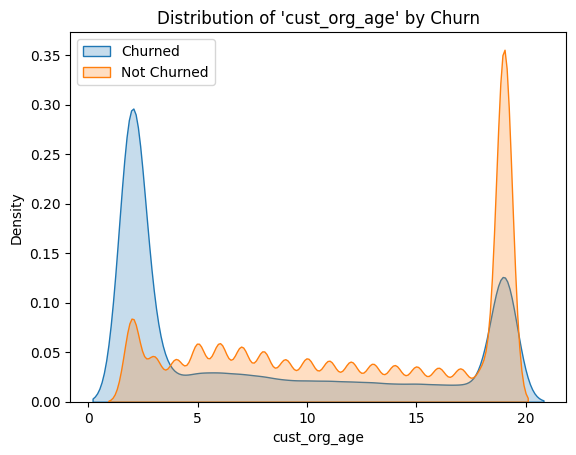


T-statistic for 'has_dependents': 12.882, P-value: 0.00000
Churned mean: 0.16588803299948437
Not churned mean: 0.15455306908877678


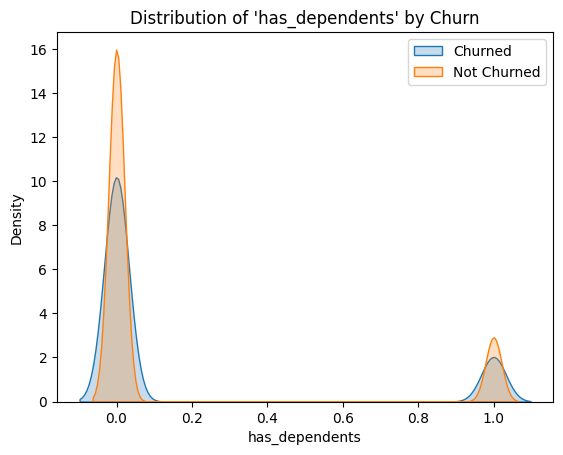


T-statistic for 'home_value_to_income': 5.698, P-value: 0.00000
Churned mean: 2.4196243434282017
Not churned mean: 2.3687276827764583


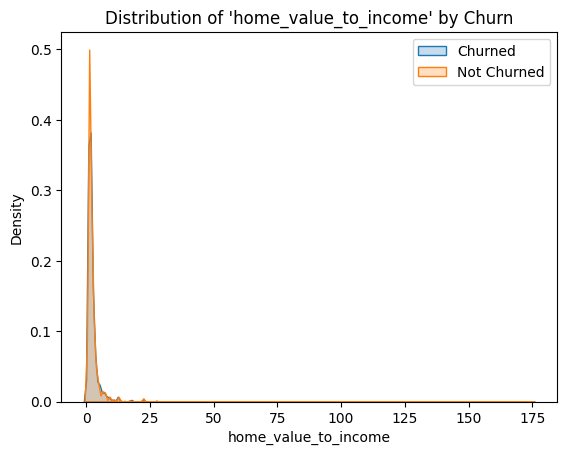

In [22]:
# Perform t-test and plot distribution of each feature by churn status

features = ['curr_ann_amt', 'days_tenure', 'age_in_years',
       'income', 'has_children', 'length_of_residence', 'marital_status',
       'home_market_value', 'home_owner', 'college_degree', 'good_credit',
       'cust_org_age', 'has_dependents',
       'home_value_to_income']

for feature in features:
    churned = df[df['Churn'] == 1][feature]
    not_churned = df[df['Churn'] == 0][feature]

    t_stat, p_val = ttest_ind(churned, not_churned)
    print(f"\nT-statistic for '{feature}': {t_stat:.3f}, P-value: {p_val:.5f}")
    print("Churned mean:", churned.mean())
    print("Not churned mean:", not_churned.mean())

    sns.kdeplot(churned, label='Churned', shade=True)
    sns.kdeplot(not_churned, label='Not Churned', shade=True)
    plt.title(f"Distribution of '{feature}' by Churn")
    plt.legend()
    plt.show()

#### T-Test Summary for Churned vs. Not Churned Customers

We performed independent t-tests to compare the means of various features between churned and non-churned customer groups. The hypothesis are as follows:

- **Null Hypothesis (H₀):** There is no difference in the mean of the feature between churned and non-churned customers.
- **Alternative Hypothesis (H₁):** There is a significant difference in the mean of the feature between churned and non-churned customers.

| Feature              | T-Statistic | P-Value | Churned Mean | Not Churned Mean | Hypothesis Concluded         |
|----------------------|-------------|---------|---------------|-------------------|-------------------------------|
| curr_ann_amt         | 23.655      | 0.00000 | 953.13        | 938.98            | Reject Null (Significant)     |
| days_tenure          | -275.765    | 0.00000 | 2245.73       | 3777.30           | Reject Null (Significant)     |
| age_in_years         | -71.247     | 0.00000 | 55.52         | 58.03             | Reject Null (Significant)     |
| income               | -7.666      | 0.00000 | 80916.97      | 81927.73          | Reject Null (Significant)     |
| has_children         | 27.452      | 0.00000 | 0.552         | 0.519             | Reject Null (Significant)     |
| length_of_residence  | -45.897     | 0.00000 | 7.00          | 7.58              | Reject Null (Significant)     |
| marital_status       | 5.834       | 0.00000 | 0.382         | 0.375             | Reject Null (Significant)     |
| home_market_value    | -0.303      | 0.76164 | 129844.59     | 129905.35         | Fail to Reject Null (Not Significant)     |
| home_owner           | -17.828     | 0.00000 | 0.807         | 0.824             | Reject Null (Significant)     |
| college_degree       | -22.417     | 0.00000 | 0.329         | 0.355             | Reject Null (Significant)     |
| good_credit          | -9.305      | 0.00000 | 0.838         | 0.846             | Reject Null (Significant)     |
| cust_org_age         | -278.697    | 0.00000 | 7.92          | 12.16             | Reject Null (Significant)     |
| has_dependents       | 12.882      | 0.00000 | 0.166         | 0.155             | Reject Null (Significant)     |
| home_value_to_income | 2.428       | 0.01518 | 2.250         | 2.228             | Reject Null (Significant)     |


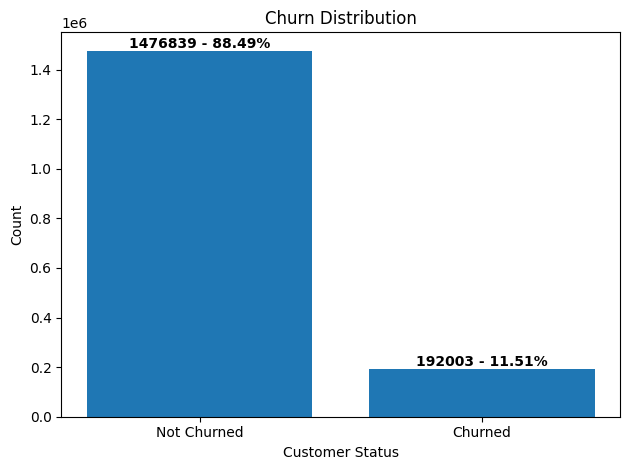

In [23]:
# Calculate churn counts and percentage distribution
churn_counts = df['Churn'].value_counts().sort_index()
churn_percent = (churn_counts / churn_counts.sum()) * 100
count = df['Churn'].value_counts().values
labels = ['Not Churned', 'Churned']

fig, ax = plt.subplots()
bars = ax.bar(labels, churn_counts.values)

# Add percentages on top
for bar, pct,cnt in zip(bars, churn_percent,count):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{cnt} - {pct:.2f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add title and axis labels
ax.set_title('Churn Distribution')
ax.set_xlabel('Customer Status')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


## 🧭 Feature Selection

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

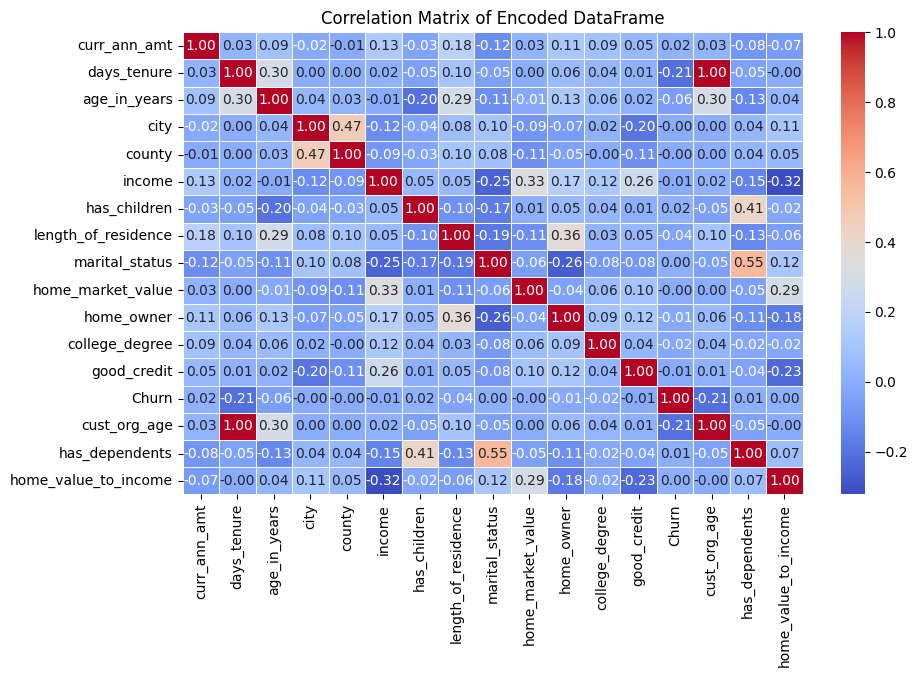

In [25]:
# Plot heatmap of feature correlations to identify relationships

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Encoded DataFrame")
plt.show()

In [26]:
# Calculate Variance Inflation Factor (VIF) for each feature to detect multicollinearity

vif_data = pd.DataFrame() 
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)

                 Feature          VIF
0           curr_ann_amt    14.715171
1            days_tenure  1157.374418
2           age_in_years    17.899405
3                   city     2.556667
4                 county     6.731356
5                 income     4.988618
6           has_children     3.484969
7    length_of_residence     4.136348
8         marital_status     3.323304
9      home_market_value     4.997258
10            home_owner     6.894233
11        college_degree     1.595717
12           good_credit     7.093140
13                 Churn     1.176443
14          cust_org_age  1470.060025
15        has_dependents     2.729232
16  home_value_to_income     2.062633


The Ideal value for VIF should be < 10.0, if not we can interpret as High multicollinearity in our data.

High VIF Features in This Dataset:

- `days_tenure` (VIF ≈ 1157)
- `cust_org_age` (VIF ≈ 1470)
- `curr_ann_amt` (VIF ≈ 15)
- `age_in_years` (VIF ≈ 18)


From the above correlation plot, we can observe that `cust_org_age` and `days_tenure` are highly correlated which means it contains similar information.

In case of `curr_ann_amt` and `age_in_years`, we already know it is statistically significant for our model. So lets perform PCA to merge the data together while keeping the most important information.

In [27]:
# merge curr_ann_amt and age_in_years using PCA

pca = PCA(n_components=1)
amt_x_age = pca.fit_transform(df[['curr_ann_amt','age_in_years']].values)
df['amt_x_age'] = amt_x_age

df.drop(columns=['cust_org_age','curr_ann_amt','age_in_years'],inplace=True)

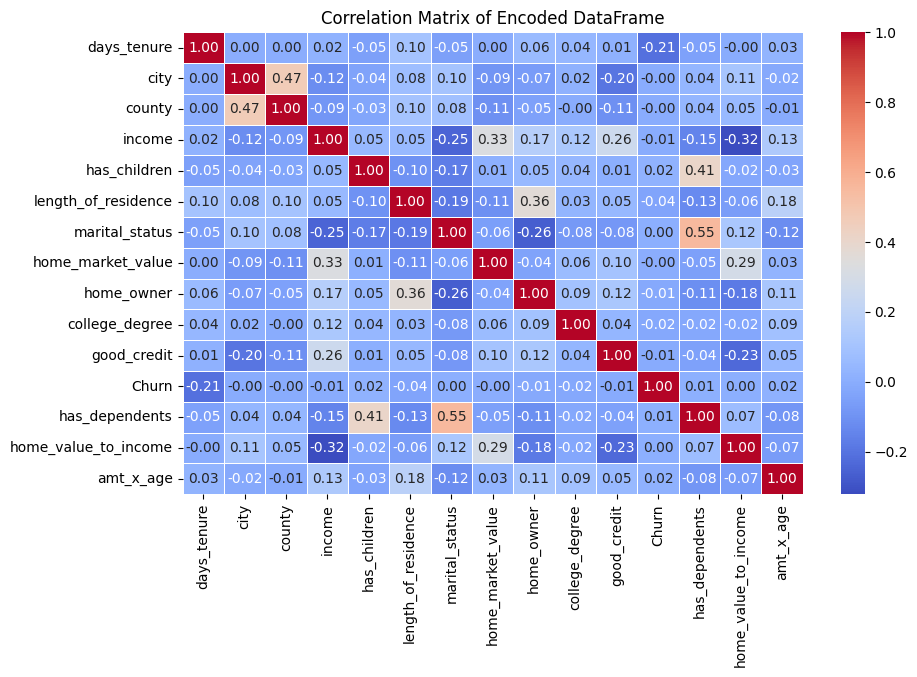

In [28]:
# Plot heatmap of feature correlations to identify relationships

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Encoded DataFrame")
plt.show()

In [29]:
# Calculate Variance Inflation Factor (VIF) for each feature to detect multicollinearity

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)

                 Feature       VIF
0            days_tenure  3.271241
1                   city  2.546276
2                 county  6.066916
3                 income  4.856745
4           has_children  3.180427
5    length_of_residence  3.873092
6         marital_status  2.981062
7      home_market_value  4.886484
8             home_owner  6.175053
9         college_degree  1.587253
10           good_credit  6.092994
11                 Churn  1.161082
12        has_dependents  2.649983
13  home_value_to_income  1.988203
14             amt_x_age  1.057295


*After removing highly collinear features and applying PCA, all remaining features now have VIF values below the ideal threshold, indicating that multicollinearity has been handled.*

## 📉 Visualizing Feature Space with PCA (Principal Component Analysis)

In [30]:
# Set random state to reproduce the results
RANDOM_STATE = 42

# Separate independent variables (X) and target variable (y)
X = df.drop(columns=['Churn'])
X = X.values

y = df['Churn']

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature set 
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

Reduced Shape: (1668842, 2)


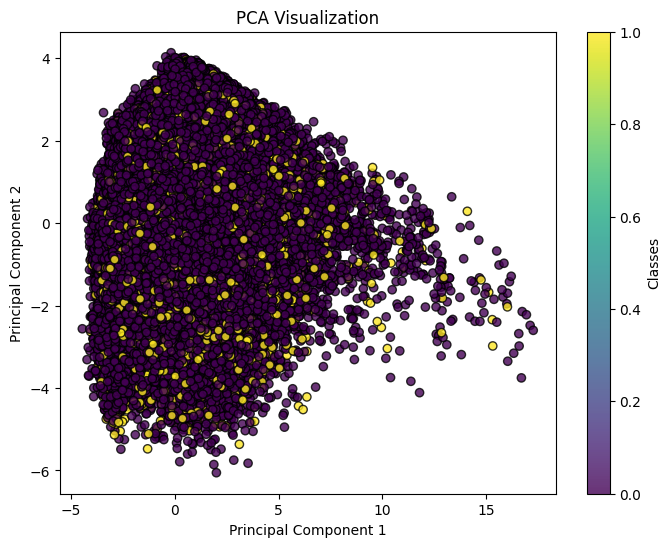

In [32]:
# Apply PCA to reduce the feature set to 2 dimensions
pca = PCA(n_components=2)
X_pca2D = pca.fit_transform(X_Scaled)

print(f"Reduced Shape: {X_pca2D.shape}")

# Plot the 2D PCA projection with respect to churn classes
plt.figure(figsize=(8, 6))
plt.scatter(X_pca2D[:, 0], X_pca2D[:, 1], c=y, cmap="viridis", edgecolor="k", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.colorbar(label="Classes")
plt.show()

Reduced Shape: (1668842, 3)


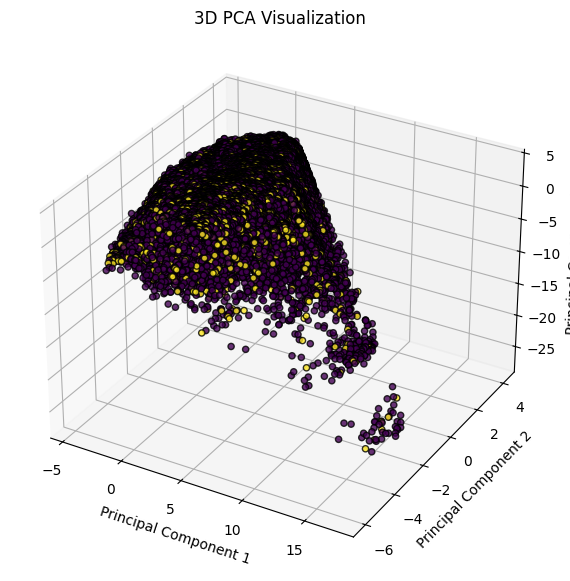

In [33]:
# Apply PCA to reduce the feature set to 3 dimensions
pca = PCA(n_components=3)
X_pca3D = pca.fit_transform(X_Scaled)

print(f"Reduced Shape: {X_pca3D.shape}")

# Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X_pca3D[:, 0], X_pca3D[:, 1], X_pca3D[:, 2], c=y, cmap="viridis", edgecolors='k', alpha=0.8)

# Plot the 3D PCA projection with respect to churn classes
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization")

plt.show()

*The feature space graph using PCA to reduce dimensionality shows that churn classes overlap over each other (Classes are densely populated), showing complex patterns which are not suitable for linear models and best captured by non-linear models.*

## ⚖️ Class Imbalance 

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot confusion matrix and print classification report
def plot_cm(X, y, model):
    
    # Generate predictions and compute confusion matrix
    if np.all(X):
        y_pred = model.predict(X)
        cm = confusion_matrix(y, y_pred)
    else:
        # For models that don't use input X (e.g., stats models)
        cm = pd.crosstab(y, np.round(model.predict(), 0), rownames=['Actual'], colnames=['Predicted'])

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    plt.title("Confusion Matrix Heatmap")
    plt.show()

    # Print classification report
    if np.all(X):
        report = classification_report(y, y_pred)
        print("Classification Report:\n", report)
    else:
        print(classification_report(y, np.round(model.predict(), 0)))

    return

In [35]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

# Function to apply resampling techniques for class balancing
def resample(X, y, method, sampling_strategy='auto'):

    # Define resampling strategies based on method name
    resampling_methods = {
        "smote": SMOTE(sampling_strategy=sampling_strategy, random_state=RANDOM_STATE),
        "adasyn": ADASYN(sampling_strategy=sampling_strategy, random_state=RANDOM_STATE),
        "rus": RandomUnderSampler(random_state=RANDOM_STATE, replacement=True),
        "ros": RandomOverSampler(random_state=RANDOM_STATE),
        "rs": SMOTEENN(random_state=RANDOM_STATE),
        "tomek": SMOTETomek(random_state=RANDOM_STATE),
    }

    # If no resampling is selected, return the original data
    if method == 'none':
        X_resampled, y_resampled = X, y
    else:
        # Apply selected resampling method
        X_resampled, y_resampled = resampling_methods[method].fit_resample(X, y)

        # Print dataset shapes before and after resampling
        print(f'Original dataset shape: y = {len(y)} , X = {len(X)}')
        print(f'Resampled dataset shape: y = {len(y_resampled)} , X = {len(X_resampled)} \n')
        print(f"Resampled Target Variable Distribution: \n {y_resampled.value_counts()} \n")

    return (X_resampled, y_resampled)

Optimization terminated successfully.
         Current function value: 0.683968
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:              1668842
Model:                          Logit   Df Residuals:                  1668828
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                 -0.9162
Time:                        00:42:15   Log-Likelihood:            -1.1414e+06
converged:                       True   LL-Null:                   -5.9569e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2666      0.002   -168.651      0.000      -0.270      -0.264
x2            -0.0006      0.

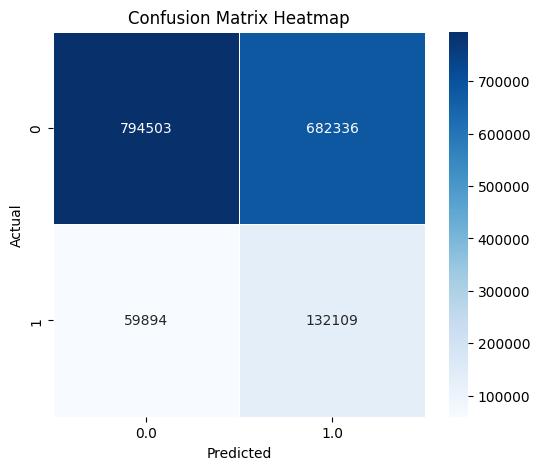

              precision    recall  f1-score   support

           0       0.93      0.54      0.68   1476839
           1       0.16      0.69      0.26    192003

    accuracy                           0.56   1668842
   macro avg       0.55      0.61      0.47   1668842
weighted avg       0.84      0.56      0.63   1668842



In [36]:
# Logistic Regression before balancing the data

logit = sml.Logit(y, X_Scaled).fit()

print(logit.summary())
plot_cm(X=False,y= y, model = logit)

#### Summary of the Model (Before Resampling)

- Pseudo R-squared: -0.9162. Pseudo R² should generally be between 0 and 1. This tells us that our model is performing worse than a null model (i.e., just guessing the majority class).
- Log-Likelihood (LL): -1.1414e+06 (Our model), -5.9569e+05 (null model) Since the log-likelihood of our model is worse than the null model, it suggests that our model is always guessing,
- LLR p-value: 1.000, This means the model is not statistically significant at all.


#### Classification Report

- High imbalance: Class 0 dominates.
- Precision for Class 1 (churners) is very low (0.16), Many false positives.
- Recall for churners is bad (0.69). Model is finding many churners, but inaccurately.


Original dataset shape: y = 1668842 , X = 1668842
Resampled dataset shape: y = 384006 , X = 384006 

Resampled Target Variable Distribution: 
 Churn
0    192003
1    192003
Name: count, dtype: int64 

Optimization terminated successfully.
         Current function value: 0.646842
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               384006
Model:                          Logit   Df Residuals:                   383992
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                 0.06680
Time:                        00:42:17   Log-Likelihood:            -2.4839e+05
converged:                       True   LL-Null:                   -2.6617e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.02

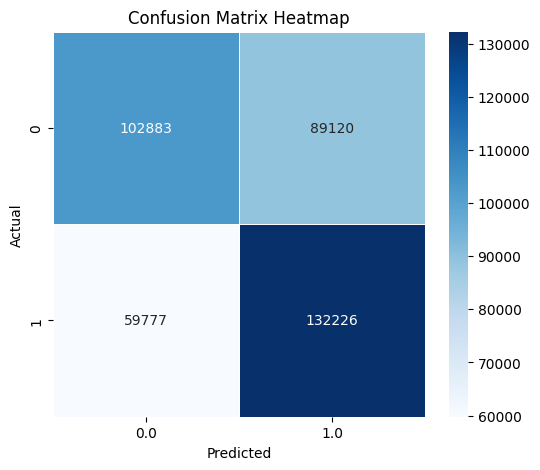

              precision    recall  f1-score   support

           0       0.63      0.54      0.58    192003
           1       0.60      0.69      0.64    192003

    accuracy                           0.61    384006
   macro avg       0.61      0.61      0.61    384006
weighted avg       0.61      0.61      0.61    384006



In [37]:
# Logistic Regression After balancing the data (Random Under Sampling)

X_Rs, y_Rs = resample(X_Scaled,y,"rus")
logit_Rs = sml.Logit(y_Rs, X_Rs).fit()

print(logit_Rs.summary())
plot_cm(X=False,y=y_Rs,model= logit_Rs)

#### Summary of the Model (After Resampling - Random Under Sampling)

- Pseudo R-squared: 0.06680. Still bad but comparitively better than before. This value indicates the model now explains a small but meaningful portion of the variance in the outcome.
- Log-Likelihood (LL): -248,390 (Our model), -266.170 (null model). The model now performs better than the null model
- LLR p-value: 0.000, The model is now statistically significant, which means the independent variables contribute meaningfully to predicting churn.


#### Classification Report

- Precision: Class 0 (0.63) - Class 1 (0.60). Much more balanced precision between classes compared to the imbalanced model.
- Recall: Class 0 (0.54) - Class 1 (0.69). The model does a better job identifying churners.

*This indicates that the model gains better understanding of the data after applying resampling, leading to more balanced and reliable classification results.*

## Machine Learning 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
def cal_metrics(X_test, y_test, model):
    # Predict labels for the test set using the trained model
    y_pred = model.predict(X_test)

    # Calculate and print the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate and print the precision: TP / (TP + FP)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Calculate and print the recall: TP / (TP + FN)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Calculate and print the F1 Score: 2 * (precision * recall) / (precision + recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    # Return the calculated metrics as a tuple
    return (accuracy, precision, recall, f1)


In [40]:
def run_models(X, y):
    # Define different resampling methods to handle class imbalance
    resample_methods = ['none', 'rus', 'ros', 'rs', 'smote', 'adasyn', 'tomek']
    
    # Dictionaries to store test and train evaluation metrics for each model and resampling method
    test_accuracy, test_precision, test_recall, test_f1 = {}, {}, {}, {}
    train_accuracy, train_precision, train_recall, train_f1 = {}, {}, {}, {}

    # Define machine learning models to be evaluated
    models = {
        "Logistic Regression": LogisticRegression(max_iter=100),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
        "XGBoost": XGBClassifier(tree_method='hist', device="cuda", random_state=RANDOM_STATE),
        "LightGBM": LGBMClassifier(random_state=RANDOM_STATE),
        "Naive Bayes": GaussianNB()
    }

    # Loop through each resampling method
    for method in resample_methods:
        print("----------------------------------------------------------------")
        print(f"\n Resample Method: {method}")

        # Apply the selected resampling method to the dataset
        X_resampled, y_resampled = resample(X, y, method=method)

        # Split resampled data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X_resampled, y_resampled, test_size=0.3, random_state=RANDOM_STATE
        )

        # Loop through each model
        for name, clf in models.items():
            print(f"\n{name} Classifier Results")

            # Train the model on training data
            clf.fit(X_train, y_train)

            # Evaluate on test data
            print("\n Test Metrics:")
            test_acc, test_prec, test_rec, test_f1_score_val = cal_metrics(X_test=X_test, y_test=y_test, model=clf)

            # Store test metrics
            key = f"{method}_{name}"
            test_accuracy[key] = test_acc
            test_precision[key] = test_prec
            test_recall[key] = test_rec
            test_f1[key] = test_f1_score_val

            # Evaluate on training data
            print("\n Train Metrics:")
            train_acc, train_prec, train_rec, train_f1_score_val = cal_metrics(X_test=X_train, y_test=y_train, model=clf)

            # Store train metrics
            train_accuracy[key] = train_acc
            train_precision[key] = train_prec
            train_recall[key] = train_rec
            train_f1[key] = train_f1_score_val

    # Convert metric dictionaries to pandas DataFrames
    test_df = pd.DataFrame({
        "Accuracy": test_accuracy,
        "Precision": test_precision,
        "Recall": test_recall,
        "F1 Score": test_f1
    }).reset_index().rename(columns={"index": "Model"})

    train_df = pd.DataFrame({
        "Accuracy": train_accuracy,
        "Precision": train_precision,
        "Recall": train_recall,
        "F1 Score": train_f1
    }).reset_index().rename(columns={"index": "Model"})

    # Optional: Save results to CSV files
    test_df.to_csv("test_results_7to3.csv", index=False)
    train_df.to_csv("train_results_7to3.csv", index=False)


In [41]:
# Run model training and evaluation across different resampling methods
run_models(X=X_Scaled, y=y)

----------------------------------------------------------------

 Resample Method: none

Logistic Regression Classifier Results

 Test Metrics:
Accuracy: 0.8843310636308981
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

 Train Metrics:
Accuracy: 0.8852129235936993
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Random Forest Classifier Results

 Test Metrics:
Accuracy: 0.8830287644336496
Precision: 0.4865043881437324
Recall: 0.20293558970816786
F1 Score: 0.28640362634952354

 Train Metrics:
Accuracy: 0.9999332299824771
Precision: 1.0
Recall: 0.9994183141551013
F1 Score: 0.9997090724633356

XGBoost Classifier Results

 Test Metrics:
Accuracy: 0.8845967166880054
Precision: 0.5027848737384313
Recall: 0.2073217060956657
F1 Score: 0.2935847118805707

 Train Metrics:
Accuracy: 0.8925114001244662
Precision: 0.5772730568445475
Recall: 0.23749934746780219
F1 Score: 0.3365405445390228

LightGBM Classifier Results
[LightGBM] [Info] Number of positive: 134093, number of negative: 1034096
[LightGBM] [Info] A

## Result Analysis

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Load train/test results dataFrame

test_df = pd.read_csv('test_results_7to3.csv')
train_df = pd.read_csv('train_results_7to3.csv')
test_df.head(10)

,Model,Accuracy,Precision,Recall,F1 Score
0,none_Logistic Regression,0.884331,0.000000,0.000000,0.000000
1,none_Random Forest,0.883029,0.486504,0.202936,0.286404
2,none_XGBoost,0.884597,0.502785,0.207322,0.293585
3,none_LightGBM,0.884749,0.505410,0.168572,0.252820
4,none_Naive Bayes,0.884331,0.000000,0.000000,0.000000
5,rus_Logistic Regression,0.628800,0.622572,0.657180,0.639408
6,rus_Random Forest,0.679823,0.758350,0.529328,0.623473
7,rus_XGBoost,0.694771,0.855224,0.470083,0.606691
8,rus_LightGBM,0.696507,0.870215,0.463028,0.604442
9,rus_Naive Bayes,0.635458,0.634683,0.641042,0.637847


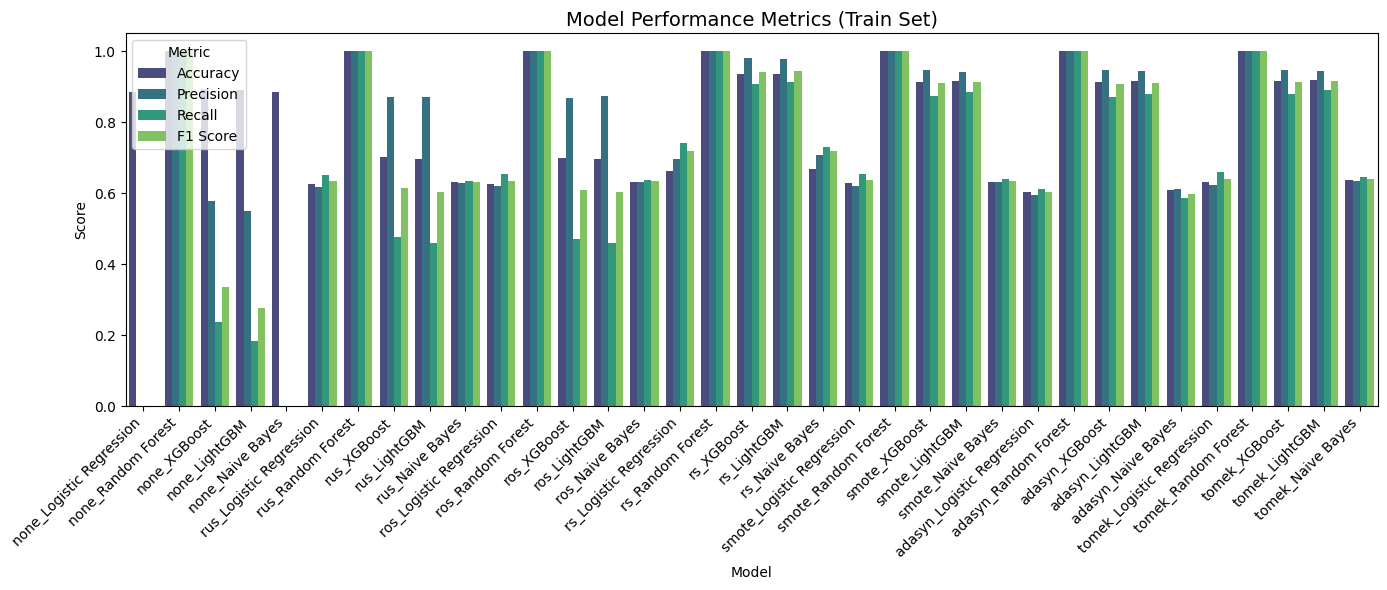

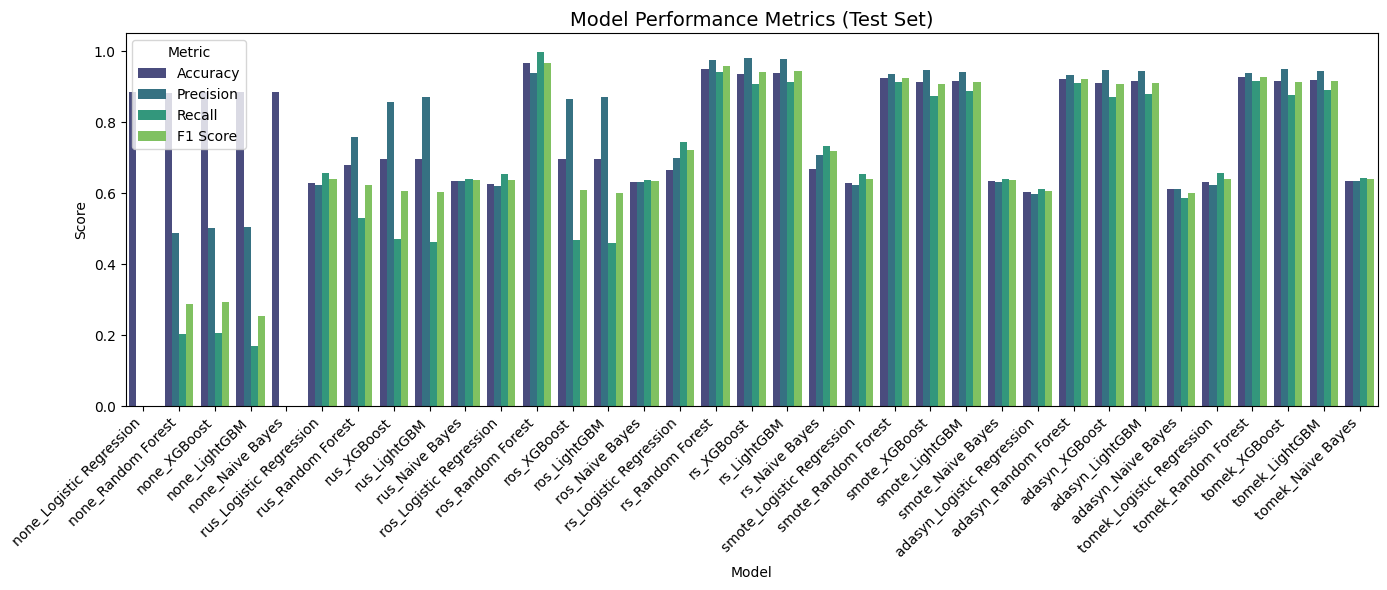

In [44]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data_set = {"Train": train_df, "Test": test_df}

for name, key in data_set.items():
    # Convert DataFrame to long format for easier seaborn plotting
    bar_df = key.melt(id_vars='Model', 
                      value_vars=metrics,
                      var_name='Metric', value_name='Score')

    # Create grouped bar chart to compare model metrics
    plt.figure(figsize=(14, 6))
    sns.barplot(data=bar_df, x='Model', y='Score', hue='Metric', palette='viridis')

    # Add plot formatting
    plt.title(f'Model Performance Metrics ({name} Set)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.05)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()


#### Train Set

- Models trained without any resampling fail to learn the minority class and tend to predict only the majority class. The only exception is Random Forest, which performs reasonably well even without resampling.

- As expected from the PCA-based feature space visualization, the linear model (Logistic Regression) struggles across all resampling methods. Similarly, the probabilistic model (Naive Bayes) fails on imbalanced data and underperforms even when balanced as it assumes that all features are completely independent given the class label.

- Random Forest achieves perfect performance results on the training set, both with and without resampling, indicating high capacity to learn and might be overfitting.

- XGBoost and LightGBM show consistent improvement when used with synthetic and hybrid resampling techniques like SMOTE, ADASYN, SMOTEENN, and SMOTETomek, suggesting they learn complex patterns more effectively when class balance is addressed. 

#### Test Set

- As anticipated, models trained on imbalanced data continue to underperform on the test set, reaffirming their failure to generalize minority class patterns.

- Notably, the Random Forest model that performed flawlessly on the imbalanced training set suffers a sharp drop in test performance. This clearly indicates overfitting, excellent learning on training data but poor generalization to unseen data.

- XGBoost and LightGBM maintain consistent and stable performance on the test set when combined with synthetic or hybrid resampling techniques. While they may not have the top score, their performance results are comparitively high.

- Random Forest models trained with random, synthetic, or combined resampling methods (e.g., ROS, SMOTE, SMOTEENN) perform well and generalize effectively. In contrast, Random UnderSampling (RUS) technique might result in loss of informative majority class samples, leading to poor performance across all models.

*Therefore, we can exclude the models trained on imbalance data and consider the rest to select the best performing model.*

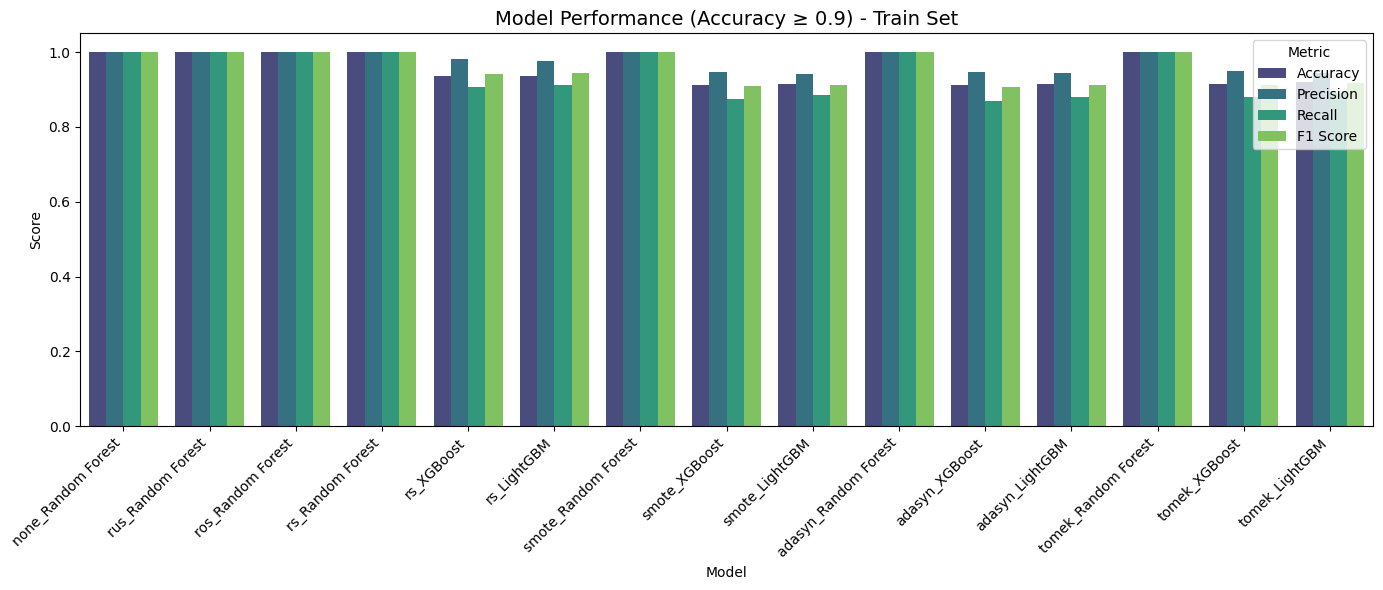

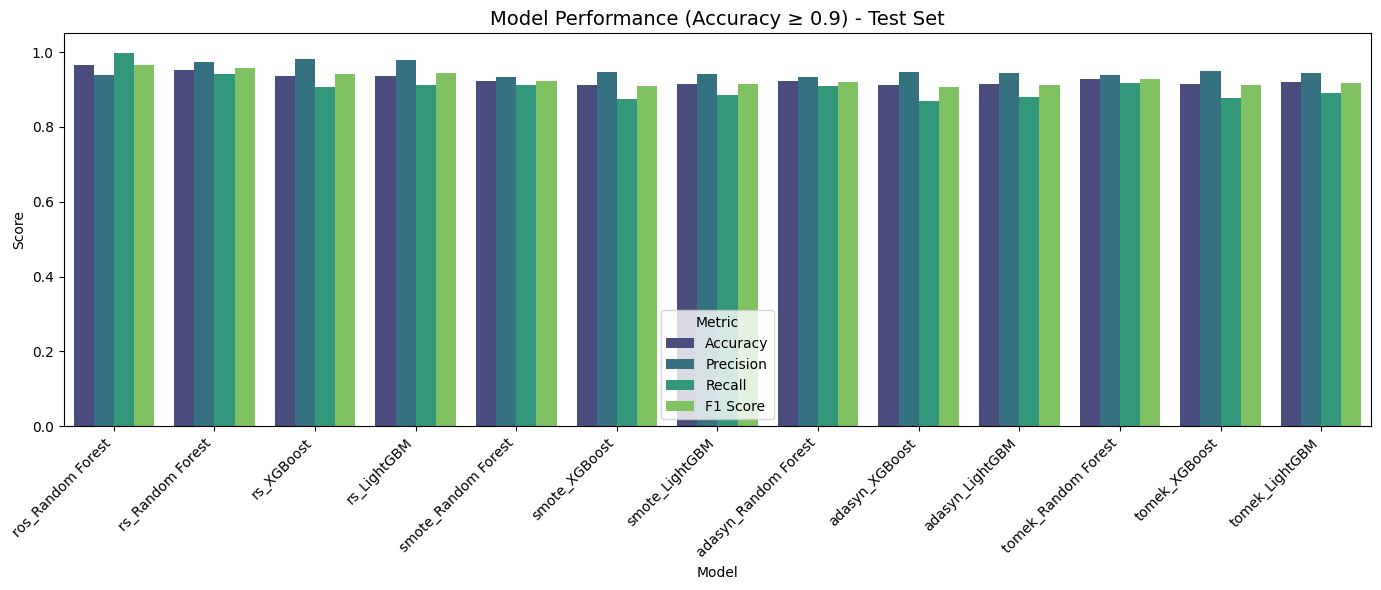

In [45]:
accuracy_threshold = 0.9

# Plot for Train and Test
for name, key in data_set.items():
    # Filter by Accuracy threshold
    filtered = key[key['Accuracy'] >= accuracy_threshold].copy()

    # Melt for barplot
    bar_df = filtered.melt(id_vars='Model', 
                           value_vars=metrics,
                           var_name='Metric', value_name='Score')

    # Plot
    plt.figure(figsize=(14, 6))
    sns.barplot(data=bar_df, x='Model', y='Score', hue='Metric', palette='viridis')
    plt.title(f'Model Performance (Accuracy ≥ {accuracy_threshold}) - {name} Set', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.05)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

We use a 90% accuracy threshold to filter top-performing models, as the dataset has already been balanced, and all models trained on imbalanced data have been excluded from this comparison.

From the test set results, it's evident that only models trained with oversampling techniques have achieved accuracy above 90%. Notably, these techniques are primarily synthetic (e.g., SMOTE, ADASYN) or hybrid oversampling methods (e.g., SMOTEENN, SMOTETomek). An exception is the Random Forest model paired with random oversampling, which also crosses the threshold, reaffirming its robustness across resampling strategies.

In [46]:
# Define thresholds
recall_threshold = 0.85
recall_drop_threshold = 0.05
acc_threshold = 0.90
acc_drop_threshold = 0.05

# Extract sampling and model name
train_df[['Sampling', 'Model_Name']] = train_df['Model'].str.split('_', n=1, expand=True)
test_df[['Sampling', 'Model_Name']] = test_df['Model'].str.split('_', n=1, expand=True)

# Merge train and test on model info
merged_df = pd.merge(train_df, test_df, on=['Sampling', 'Model_Name'], suffixes=('_Train', '_Test'))

# Calculate drops
merged_df['Recall_Drop'] = merged_df['Recall_Train'] - merged_df['Recall_Test']
merged_df['Accuracy_Drop'] = merged_df['Accuracy_Train'] - merged_df['Accuracy_Test']

# Filter based on thresholds
filtered_df = merged_df[
    (merged_df['Recall_Test'] >= recall_threshold) &
    (merged_df['Recall_Drop'] <= recall_drop_threshold) &
    (merged_df['Accuracy_Test'] >= acc_threshold) &
    (merged_df['Accuracy_Drop'] <= acc_drop_threshold)
]

# Final comparison table
comparison_df = filtered_df[['Sampling', 'Model_Name',
                             'Accuracy_Train', 'Accuracy_Test', 'Accuracy_Drop',
                             'Recall_Train', 'Recall_Test', 'Recall_Drop']]

# Sort by F1 Score descending
comparison_df = comparison_df.sort_values(by='Recall_Test', ascending=False)

# Display
print(comparison_df.to_string(index=False))


Sampling    Model_Name  Accuracy_Train  Accuracy_Test  Accuracy_Drop  Recall_Train  Recall_Test  Recall_Drop
     ros Random Forest        1.000000       0.965540       0.034460      1.000000     0.997749     0.002251
      rs      LightGBM        0.936644       0.937241      -0.000597      0.912158     0.912731    -0.000573
      rs       XGBoost        0.935326       0.935604      -0.000277      0.906707     0.906946    -0.000239
   tomek      LightGBM        0.918657       0.918687      -0.000030      0.891065     0.890511     0.000553
   smote      LightGBM        0.915851       0.915789       0.000062      0.886116     0.886448    -0.000332
  adasyn      LightGBM        0.914596       0.914600      -0.000005      0.879646     0.880103    -0.000457
   tomek       XGBoost        0.915452       0.914845       0.000607      0.878876     0.877602     0.001274
   smote       XGBoost        0.912334       0.911682       0.000652      0.873948     0.873832     0.000116
  adasyn       XGBo

## Conclusion

Understanding of model performance by considering not just accuracy, but also Recall and generalization. These metrics help identify models that are not only accurate but also consistent and effective at detecting actual churners.

---

### Why Recall?

In churn prediction, the goal is to identify as many churners as possible. Missing a churner means a direct loss to the organization. Therefore, `Recall` becomes the most important metric, as it tells us how well the model captures the positive class (churners).

> Recall = TP / (TP + FN)

Where:
- TP (True Positives): Correctly predicted churners  
- FN (False Negatives): Actual churners that the model failed to catch

A high recall ensures that the model is effective in flagging customers at risk of leaving.

---

### Best Performing Model: `ros_Random Forest`

The best performing model is the Random Forest classifier trained with Random Oversampling (ROS). It achieved the highest test accuracy of 96.5% and an outstanding recall of 99.77%, indicating that it correctly identified nearly all churners.

Despite a slight accuracy drop (~3.45%) from training to testing, the model's recall remains extremely high, showing it generalizes well and avoids missing churners.

---

### Second Best Model: `rs_LightGBM`

The second best model is LightGBM paired with Random sampling-based techniques such as SMOTEENN. This model achieved a test accuracy of 93.7% and a recall of 91.27%.

What makes this model stand out is its excellent generalization: there is almost no performance drop between training and test sets. That means it's stable, reliable, and less prone to overfitting an ideal choice where consistency matters and not raw performance.

Although it doesn't match the top model in raw performance, `rs_LightGBM` offers a very strong balance between accuracy and reliability.

---

## ros_Random Forest and rs_LightGBM: Implementation & Results

Original dataset shape: y = 1668842 , X = 1668842
Resampled dataset shape: y = 2953678 , X = 2953678 

Resampled Target Variable Distribution: 
 Churn
0    1476839
1    1476839
Name: count, dtype: int64 


 Train Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


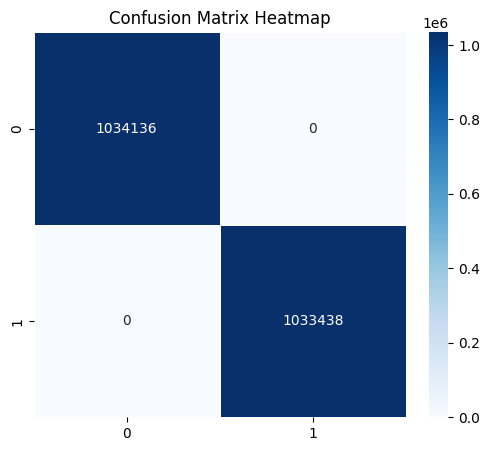

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1034136
           1       1.00      1.00      1.00   1033438

    accuracy                           1.00   2067574
   macro avg       1.00      1.00      1.00   2067574
weighted avg       1.00      1.00      1.00   2067574

------------------------------------------------------------------------

 Test Metrics:
Accuracy: 0.9655401623285754
Precision: 0.9374136542780862
Recall: 0.9977492157212094
F1 Score: 0.9666408475092889


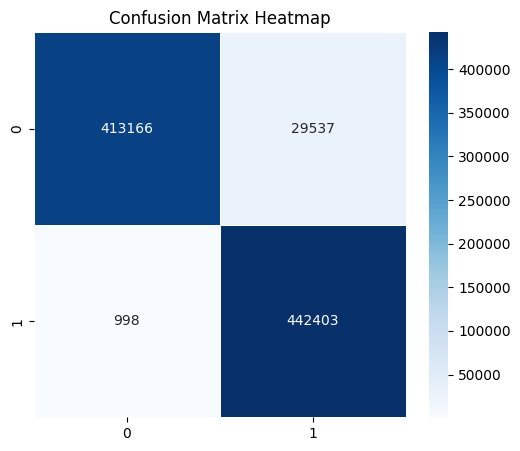

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    442703
           1       0.94      1.00      0.97    443401

    accuracy                           0.97    886104
   macro avg       0.97      0.97      0.97    886104
weighted avg       0.97      0.97      0.97    886104



In [47]:
X_ros, y_ros = resample(X_Scaled, y,method='ros')
Rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=RANDOM_STATE)
Rf.fit(X_train, y_train)

# Evaluate on training data
print("\n Train Metrics:")
cal_metrics(X_test=X_train, y_test=y_train, model=Rf)
plot_cm(X=X_train,y=y_train,model= Rf)

print("------------------------------------------------------------------------")

# Evaluate on test data
print("\n Test Metrics:")
cal_metrics(X_test=X_test, y_test=y_test, model=Rf)
plot_cm(X=X_test,y=y_test,model= Rf)

#### Second Best Performing Model

Original dataset shape: y = 1668842 , X = 1668842
Resampled dataset shape: y = 2198514 , X = 2198514 

Resampled Target Variable Distribution: 
 Churn
1    1277173
0     921341
Name: count, dtype: int64 

[LightGBM] [Info] Number of positive: 893784, number of negative: 645175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2190
[LightGBM] [Info] Number of data points in the train set: 1538959, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.580772 -> initscore=0.325943
[LightGBM] [Info] Start training from score 0.325943

 Train Metrics:
Accuracy: 0.9366441861024237
Precision: 0.9772373666785734
Recall: 0.9121577472856977
F1 Score: 0.9435767334897335


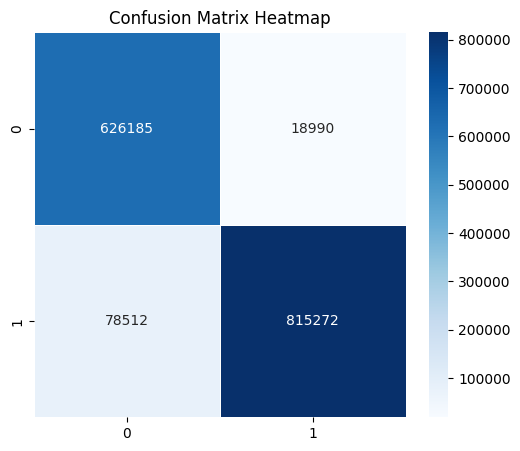

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93    645175
           1       0.98      0.91      0.94    893784

    accuracy                           0.94   1538959
   macro avg       0.93      0.94      0.94   1538959
weighted avg       0.94      0.94      0.94   1538959

------------------------------------------------------------------------

 Test Metrics:
Accuracy: 0.937241018565548
Precision: 0.9778268961007751
Recall: 0.9127309338556923
F1 Score: 0.9441582181570445


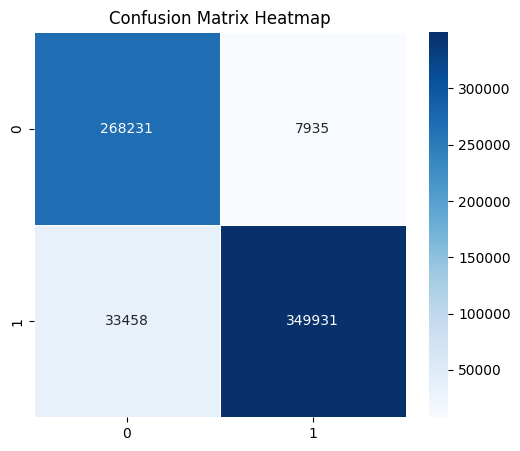

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93    276166
           1       0.98      0.91      0.94    383389

    accuracy                           0.94    659555
   macro avg       0.93      0.94      0.94    659555
weighted avg       0.94      0.94      0.94    659555



In [48]:
X_rs, y_rs = resample(X_Scaled, y,method='rs')
GBM = LGBMClassifier(random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.3, random_state=RANDOM_STATE)
GBM.fit(X_train, y_train)

# Evaluate on training data
print("\n Train Metrics:")
cal_metrics(X_test=X_train, y_test=y_train, model=GBM)
plot_cm(X=X_train,y=y_train,model= GBM)

print("------------------------------------------------------------------------")

# Evaluate on test data
print("\n Test Metrics:")
cal_metrics(X_test=X_test, y_test=y_test, model=GBM)
plot_cm(X=X_test,y=y_test,model= GBM)